In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import  flask

### problem statement

### DATA GATHERING

In [7]:
df=pd.read_csv('penguine.csv')
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...,...
339,339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### DATA UNDERSTANDING

In [8]:
df.duplicated().sum()
df.shape
df.info()
df.describe()




df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### EDA

In [9]:
df.skew(numeric_only=True)#to check outliers

Unnamed: 0           0.000000
bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64

<Axes: ylabel='Density'>

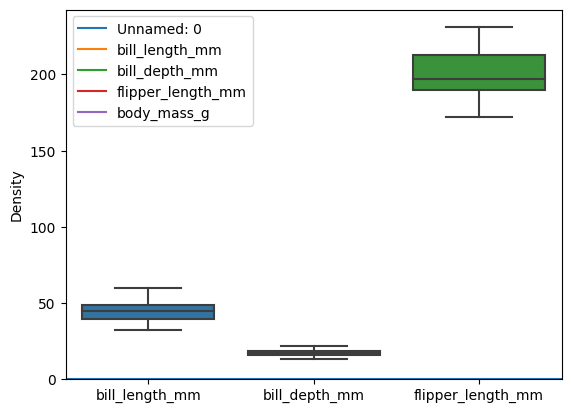

In [10]:
sns.kdeplot(df)
sns.boxplot(df[['bill_length_mm','bill_depth_mm','flipper_length_mm']])

<Axes: >

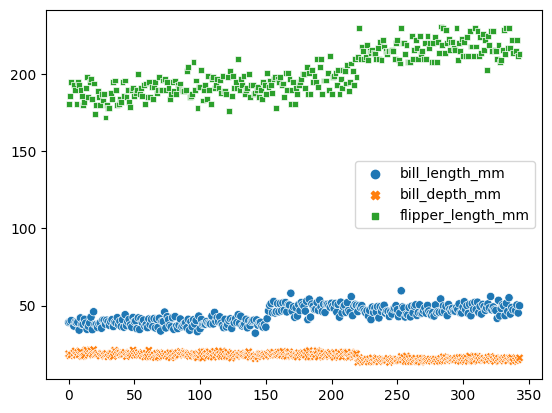

In [11]:
sns.scatterplot(df[['bill_length_mm','bill_depth_mm','flipper_length_mm']])

In [12]:
df.describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,342.000000,342.000000,342.000000,342.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386
std,99.448479,5.459584,1.974793,14.061714,801.954536
min,0.000000,32.100000,13.100000,172.000000,2700.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000


In [13]:
#iqr
q3=257.250000
q1=85.750000
IQR=q3-q1
IQR
upper=q3+(IQR*1.5)
upper
l=q1-(IQR*1.5)
l#below -171.5 is outliers

-171.5

#### Feature Selection

In [14]:

df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
from sklearn.impute import KNNImputer


df.isna().sum()

In [16]:
#df.info()
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [17]:
df=pd.get_dummies(df,columns=['species'],dtype=int)
df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0
1,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0
2,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0
3,Torgersen,NaN,NaN,NaN,NaN,NaN,1,0,0
4,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0
...,...,...,...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN,0,0,1
340,Biscoe,46.8,14.3,215.0,4850.0,Female,0,0,1
341,Biscoe,50.4,15.7,222.0,5750.0,Male,0,0,1
342,Biscoe,45.2,14.8,212.0,5200.0,Female,0,0,1


In [18]:
df=pd.get_dummies(df,columns=['island'],dtype=int)
df



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,Male,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,Female,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,Female,1,0,0,0,0,1
3,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,Female,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0,0
340,46.8,14.3,215.0,4850.0,Female,0,0,1,1,0,0
341,50.4,15.7,222.0,5750.0,Male,0,0,1,1,0,0
342,45.2,14.8,212.0,5200.0,Female,0,0,1,1,0,0


In [19]:
df['sex'].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

In [20]:
df['sex'].replace({'Male':1,'Female':0},inplace=True)

In [21]:
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

df.info()

In [22]:
x=df.drop(['sex'],axis=1)
x
y=df['sex']
y


0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
339    1.0
340    0.0
341    1.0
342    0.0
343    1.0
Name: sex, Length: 344, dtype: float64

In [23]:
from sklearn.impute import KNNImputer

In [24]:
x.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen'],
      dtype='object')

In [25]:
new = KNNImputer()
N=new.fit_transform(x)

X=pd.DataFrame(N,columns =x.columns)


In [26]:
df.isna().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
dtype: int64

### FEATURE ENGINEERING

### Spliiting Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=11)

### MODEL TRAINING

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logr=LogisticRegression()
logr

LogisticRegression()

In [31]:
logr.fit(x_train,y_train)

LogisticRegression()

### Evaluation

In [32]:
#testing
from sklearn.metrics import accuracy_score,classification_report
y_pred=logr.predict(x_test)
y_pred
accuracy_score=accuracy_score(y_pred,y_test)
print("accuracy_score on Logistic Regression",accuracy_score)
clf_report=classification_report(y_pred,y_test)
print(clf_report)

accuracy_score on Logistic Regression 0.8405797101449275
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        32
         1.0       0.86      0.84      0.85        37

    accuracy                           0.84        69
   macro avg       0.84      0.84      0.84        69
weighted avg       0.84      0.84      0.84        69



In [33]:
#training
from sklearn.metrics import accuracy_score,classification_report
y_pred_train=logr.predict(x_train)
y_pred_train
accuracy=accuracy_score(y_pred_train,y_train)
print("accuracy on logistic",accuracy)
clf_report=classification_report(y_pred_train,y_train)
print(clf_report)

accuracy on logistic 0.8290909090909091
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       131
         1.0       0.84      0.83      0.84       144

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275



In [105]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [106]:
normal=MinMaxScaler()
normal.fit(X)
array1=normal.transform(X)
x_n=pd.DataFrame(array1,columns=X.columns)
x_n

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,0.254545,0.666667,0.152542,0.291667,1.0,0.0,0.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,1.0,0.0,0.0,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,1.0,0.0,0.0,0.0,0.0,1.0
3,0.224727,0.633333,0.338983,0.355556,1.0,0.0,0.0,0.0,0.0,1.0
4,0.167273,0.738095,0.355932,0.208333,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
339,0.548364,0.211905,0.745763,0.652778,0.0,0.0,1.0,1.0,0.0,0.0
340,0.534545,0.142857,0.728814,0.597222,0.0,0.0,1.0,1.0,0.0,0.0
341,0.665455,0.309524,0.847458,0.847222,0.0,0.0,1.0,1.0,0.0,0.0
342,0.476364,0.202381,0.677966,0.694444,0.0,0.0,1.0,1.0,0.0,0.0


In [107]:
standard=StandardScaler()
standard.fit(X)
array2=standard.transform(X)
x_s=pd.DataFrame(array2,columns=X.columns)
x_s

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,-0.883963,0.787225,-1.420539,-0.567079,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.369680
1,-0.810529,0.127714,-1.064213,-0.504567,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.369680
2,-0.663661,0.432103,-0.422826,-1.192199,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.369680
3,-1.034503,0.645176,-0.636622,-0.279523,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.369680
4,-1.324568,1.091614,-0.565357,-0.942151,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.369680
...,...,...,...,...,...,...,...,...,...,...
339,0.599406,-1.150722,1.073743,1.058234,-0.889757,-0.496364,1.331989,1.023533,-0.750757,-0.421998
340,0.529644,-1.444966,1.002478,0.808186,-0.889757,-0.496364,1.331989,1.023533,-0.750757,-0.421998
341,1.190551,-0.734723,1.501334,1.933403,-0.889757,-0.496364,1.331989,1.023533,-0.750757,-0.421998
342,0.235907,-1.191308,0.788682,1.245770,-0.889757,-0.496364,1.331989,1.023533,-0.750757,-0.421998


In [108]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [109]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [110]:
#Testing Data
y_pred = knn.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score, classification_report
accuracy_sore=accuracy_score(y_pred,y_test)
accuracy_sore
print("accuracy_score",accuracy_sore)
clf_report=classification_report(y_pred,y_test)
print(clf_report)
print('*'*50)
print('Conclusion:- Acuuracy on knn Tree Testing Data=',accuracy_sore)


accuracy_score 0.7101449275362319
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71        35
         1.0       0.69      0.74      0.71        34

    accuracy                           0.71        69
   macro avg       0.71      0.71      0.71        69
weighted avg       0.71      0.71      0.71        69

**************************************************
Conclusion:- Acuuracy on knn Tree Testing Data= 0.7101449275362319


In [111]:
#Training Data
y_pred_train = knn.predict(x_train)
y_pred
from sklearn.metrics import accuracy_score, classification_report

accuracy_score=accuracy_score(y_pred_train,y_train)
print("accuracy_score",accuracy_score)
clf_report=classification_report(y_pred_train,y_train)
print(clf_report)
print('*'*50)
print('Conclusion:- Acuuracy on knn Tree Traing Data=',accuracy_score)



accuracy_score 0.8327272727272728
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84       148
         1.0       0.78      0.88      0.83       127

    accuracy                           0.83       275
   macro avg       0.83      0.84      0.83       275
weighted avg       0.84      0.83      0.83       275

**************************************************
Conclusion:- Acuuracy on knn Tree Traing Data= 0.8327272727272728


### Decision Tree

In [136]:
dt=DecisionTreeClassifier()
dt
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=7)

In [139]:
y_pred_train= dt.predict(x_train)
y_pred_train
from sklearn.metrics import accuracy_score, classification_report
accuracy_score=accuracy_score(y_pred_train,y_train)
accuracy_score

print('*'*50)
print('Conclusion:- Acuuracy on Decison Tree Testing Data=',accuracy_score)

**************************************************
Conclusion:- Acuuracy on Decison Tree Testing Data= 1.0


In [140]:
#Testing Data
y_pred = dt.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score, classification_report
accuracy_score=accuracy_score(y_pred,y_test)
accuracy_score

print('*'*50)
print('Conclusion:- Acuuracy on Decison Tree Training Data=',accuracy_score)


**************************************************
Conclusion:- Acuuracy on Decison Tree Training Data= 0.855072463768116


### Random Forest 

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [164]:
from sklearn.metrics import accuracy_score, classification_report

In [165]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)


In [144]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [166]:
y_pred=rf.predict(x_test)
accuracy_rf=accuracy_score(y_pred,y_test)
accuracy_rf
classification_report=classification_report(y_pred,y_test)
print(classification_report)
print('Accuracy on rf',accuracy_rf)

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.83      0.97      0.90        31

    accuracy                           0.90        69
   macro avg       0.90      0.90      0.90        69
weighted avg       0.91      0.90      0.90        69

Accuracy on rf 0.8985507246376812


In [167]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_train=rf.predict(x_train)
accuracy_rf = accuracy_score(y_pred_train, y_train)
print('Accuracy on rf:', accuracy_rf)

classification_rep = classification_report(y_pred_train, y_train)
print(classification_rep)


Accuracy on rf: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       132
         1.0       1.00      1.00      1.00       143

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [97]:
from sklearn.metrics import accuracy_score,classification_report

In [98]:
from sklearn.model_selection import train_test_split 

In [147]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [100]:
from sklearn.ensemble import AdaBoostClassifier

# Load and preprocess your data (X_train, y_train)

# Create an AdaBoostClassifier instance
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model on your training data
ada_classifier.fit(x_train, y_train)


AdaBoostClassifier(random_state=42)

In [148]:
# Testing Data Evaluation

y_pred = ada_classifier.predict(x_test)
cnf_report = classification_report(y_test, y_pred)
print("Confusion Matrix :\n", clf_report)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)


Confusion Matrix :
               precision    recall  f1-score   support

         0.0       0.89      0.79      0.84       148
         1.0       0.78      0.88      0.83       127

    accuracy                           0.83       275
   macro avg       0.83      0.84      0.83       275
weighted avg       0.84      0.83      0.83       275

Accuracy : 0.855072463768116


In [149]:
# Training Data Evaluation

y_pred_train = ada_classifier.predict(x_train)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Accuracy : 0.9490909090909091
Classification Report :
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       132
         1.0       0.95      0.95      0.95       143

    accuracy                           0.95       275
   macro avg       0.95      0.95      0.95       275
weighted avg       0.95      0.95      0.95       275



In [335]:
adb_clf = AdaBoostClassifier(random_state=1)
hyp_grid = {
            "n_estimators" : np.arange(10,50),
            "learning_rate" : np.arange(0.1, 2, 0.2)
            }

gscv_adb_clf = GridSearchCV(adb_clf, hyp_grid, cv = 5, n_jobs=-1)
gscv_adb_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])})

In [336]:
#Single row testing

In [216]:
X.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen'],
      dtype='object')

In [217]:
array=np.zeros([1,10])
array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [218]:
X[7:8]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
7,39.2,19.6,195.0,4675.0,1.0,0.0,0.0,0.0,0.0,1.0


In [162]:

import numpy as np
import pandas as pd
import pickle
import json


class Penguine():
    def __init__(self,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,island):
    
    
        self.bill_length_mm=bill_length_mm
        self.bill_depth_mm=bill_depth_mm
        self.flipper_length_mm=flipper_length_mm
        self.body_mass_g=body_mass_g
        self.species= "species_"+species 
        self.island="island_"+island

    def load_data(self):
        with open("model.pkl","rb") as k:
            self.model = pickle.load(k)

        with open("pred_data.json","r") as l:
            self.data = json.load(l)
    def Pred_Penguine(self):
        self.load_data()

        species_index=self.data['col_names'].index(self.species)
        island_index=self.data['col_names'].index(self.island)
        array=np.zeros([1,10])
        array[0][0]=self.bill_length_mm
        array[0][1]=self.bill_depth_mm
        array[0][2]=self.flipper_length_mm
        array[0][3]=self.body_mass_g
        array[0,species_index]=1
        array[0,island_index]=1

        print(array)
        pred= self.model.predict(array)
        return pred
obj=Penguine(100,1,50,111,'Chinstrap','Torgersenbi')
obj.Pred_Penguine()




[[100.   1.  50. 111.   0.   1.   0.   0.   0.   1.]]


array([0.])

In [237]:
array=np.zeros([1,6])
array

array([[0., 0., 0., 0., 0., 0.]])

In [ ]:
class 

In [150]:
Data={'col_names':['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersenbi']}
Data

{'col_names': ['bill_length_mm',
  'bill_depth_mm',
  'flipper_length_mm',
  'body_mass_g',
  'species_Adelie',
  'species_Chinstrap',
  'species_Gentoo',
  'island_Biscoe',
  'island_Dream',
  'island_Torgersenbi']}

In [151]:
import pickle
import json

In [153]:
with open("model.pkl",'wb') as f:
    pickle.dump(rf,f)

In [154]:
with open('pred_data.json',"w") as p:
    json.dump(Data,p)

In [169]:
import flask